<a href="https://colab.research.google.com/github/joaoavanzini/ecg-embeddings/blob/main/simpleRNN_vitalDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Recurrent Neural Network for multi-step time series prediction

**Advisor:** Marcos M. Raimundo <br>
**Student:** João Victor P. B. Avanzini

In [ ]:
from pandas import read_csv
from pandas import DataFrame
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [ ]:
def get_train_test(dataset, split_percent, time_steps, horizon):
    df = read_csv(dataset, usecols=[0], engine='python')
    data = np.array(df.values.astype('float32'))

    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data).flatten()

    df_features = pd.DataFrame()
    for i in range(time_steps):
        df_features[f't-{time_steps-i-1}'] = data_scaled[i:len(data)-horizon-time_steps+i+1]

    df_labels = pd.DataFrame()
    for i in range(1, horizon+1):
        df_labels[f't+{i}'] = data_scaled[time_steps+i-1:len(data)-horizon+i]

    df = pd.concat([df_features, df_labels], axis=1)

    dataX = np.array(df_features)
    datay = np.array(df_labels)

    split = int(len(data) * split_percent)
    X = dataX[:split, :]
    y = datay[:split]
    Xt = dataX[split:, :]
    yt = datay[split:]

    return X, y, Xt, yt


In [ ]:
time_steps = 100
horizon = 10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X, y, Xt, yt = get_train_test('/content/drive/MyDrive/Colab Notebooks/subject_1_ecg_ii.csv', 0.8, time_steps, horizon)

In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, activation=activation[0], input_shape=input_shape))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
model = create_RNN(hidden_units=30, dense_units=horizon, input_shape=(time_steps,1), activation=['tanh', 'tanh'])
train_predict = model.fit(X, y, epochs=2 0, batch_size=32, verbose=2)

Epoch 1/20
28851/28851 - 493s - loss: 7.4904e-04 - 493s/epoch - 17ms/step
Epoch 2/20
28851/28851 - 479s - loss: 5.5071e-04 - 479s/epoch - 17ms/step
Epoch 3/20
28851/28851 - 490s - loss: 5.1385e-04 - 490s/epoch - 17ms/step
Epoch 4/20
28851/28851 - 479s - loss: 4.8960e-04 - 479s/epoch - 17ms/step
Epoch 5/20
28851/28851 - 482s - loss: 4.7820e-04 - 482s/epoch - 17ms/step
Epoch 6/20
28851/28851 - 475s - loss: 4.6980e-04 - 475s/epoch - 16ms/step
Epoch 7/20
28851/28851 - 477s - loss: 5.1975e-04 - 477s/epoch - 17ms/step
Epoch 8/20
28851/28851 - 479s - loss: 4.8039e-04 - 479s/epoch - 17ms/step
Epoch 9/20
28851/28851 - 473s - loss: 4.5011e-04 - 473s/epoch - 16ms/step
Epoch 10/20
28851/28851 - 472s - loss: 4.5774e-04 - 472s/epoch - 16ms/step
Epoch 11/20
28851/28851 - 478s - loss: 4.2331e-04 - 478s/epoch - 17ms/step
Epoch 12/20
28851/28851 - 476s - loss: 3.9757e-04 - 476s/epoch - 17ms/step
Epoch 13/20
28851/28851 - 478s - loss: 4.4917e-04 - 478s/epoch - 17ms/step
Epoch 14/20
28851/28851 - 478s - l

In [ ]:
def print_error(trainY, testY, train_predict, test_predict,i):
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    print('t+%d RMSE train: %.3f RMSE' % (i+1, train_rmse))
    print('t+%d RMSE test: %.3f RMSE' % (i+1, test_rmse))

In [ ]:
train_predict = model.predict(X)
test_predict = model.predict(Xt)

7210/7210 [==============================] - 53s 7ms/step


In [ ]:
for i in range(horizon):
    y_pred_train = train_predict if horizon == 1 else train_predict[:, i]
    y_pred_test = test_predict if horizon == 1 else test_predict[:, i]
    y_train = y if horizon == 1 else y[:, i]
    y_test = yt if horizon == 1 else yt[:, i]

    print_error(y_train, y_test, y_pred_train, y_pred_test, i)

t+1 RMSE train: 0.012 RMSE
t+1 RMSE test: 0.021 RMSE
t+2 RMSE train: 0.014 RMSE
t+2 RMSE test: 0.020 RMSE
t+3 RMSE train: 0.016 RMSE
t+3 RMSE test: 0.021 RMSE
t+4 RMSE train: 0.017 RMSE
t+4 RMSE test: 0.024 RMSE
t+5 RMSE train: 0.018 RMSE
t+5 RMSE test: 0.024 RMSE
t+6 RMSE train: 0.017 RMSE
t+6 RMSE test: 0.024 RMSE
t+7 RMSE train: 0.018 RMSE
t+7 RMSE test: 0.024 RMSE
t+8 RMSE train: 0.018 RMSE
t+8 RMSE test: 0.024 RMSE
t+9 RMSE train: 0.019 RMSE
t+9 RMSE test: 0.027 RMSE
t+10 RMSE train: 0.020 RMSE
t+10 RMSE test: 0.027 RMSE


In [ ]:
def plot_result(trainY, testY, train_predict, test_predict,i):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(30, 6), dpi=300)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Time steps')
    plt.ylabel('Actual and Predicted Values')
    plt.title('t+%d Predition (The Red Line Separates The Training And Test Examples)' % (i+1))
    plt.grid(True)

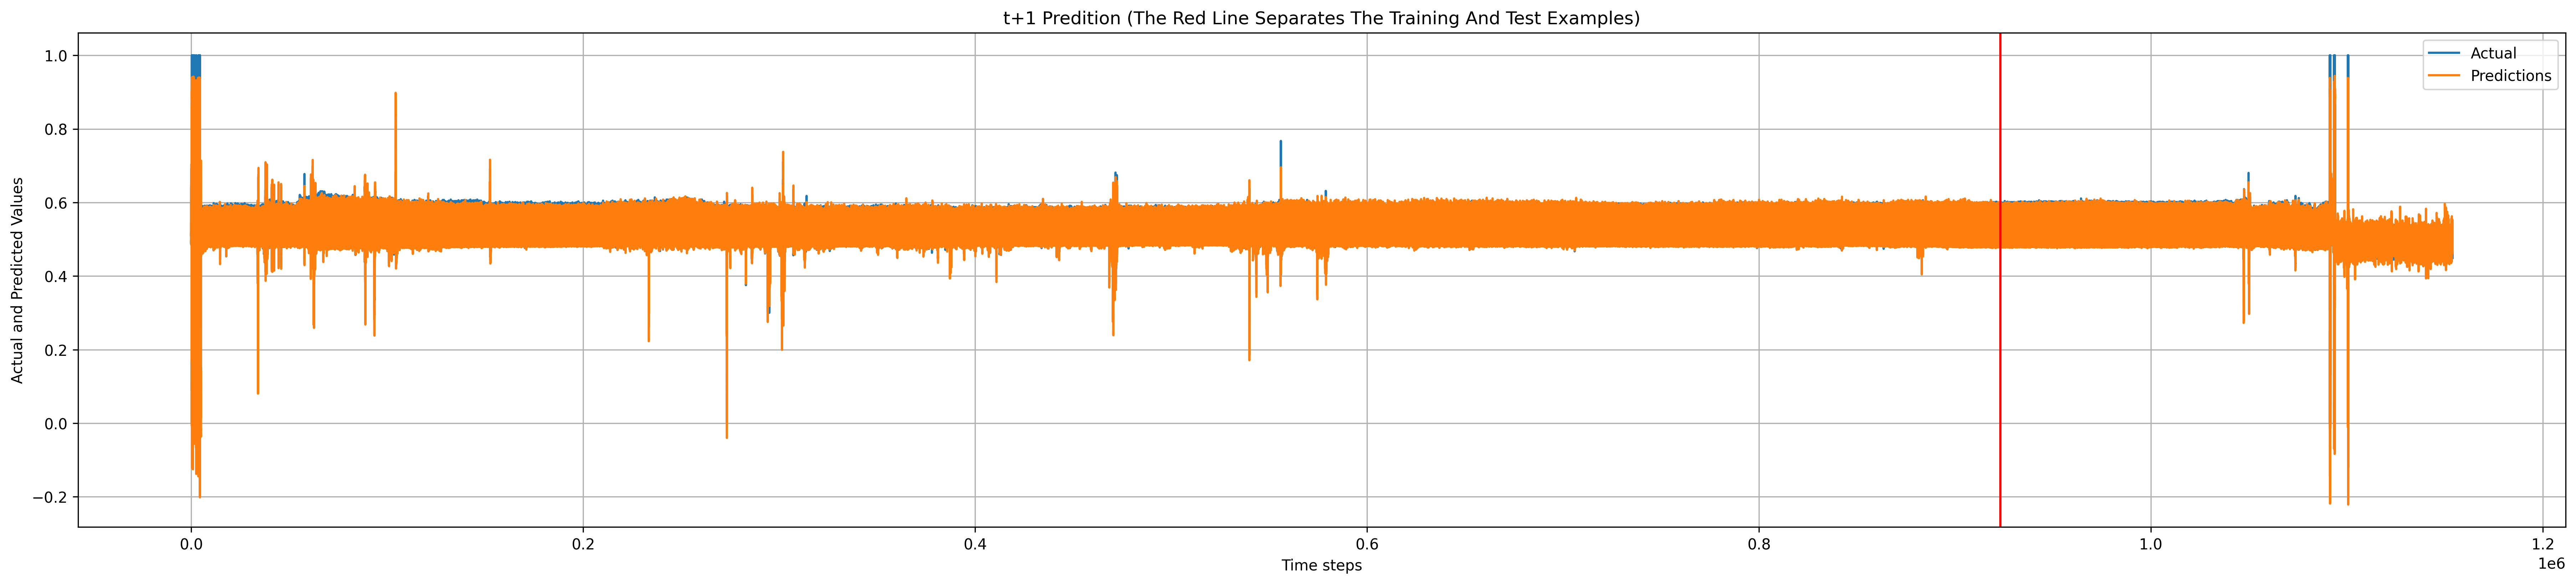

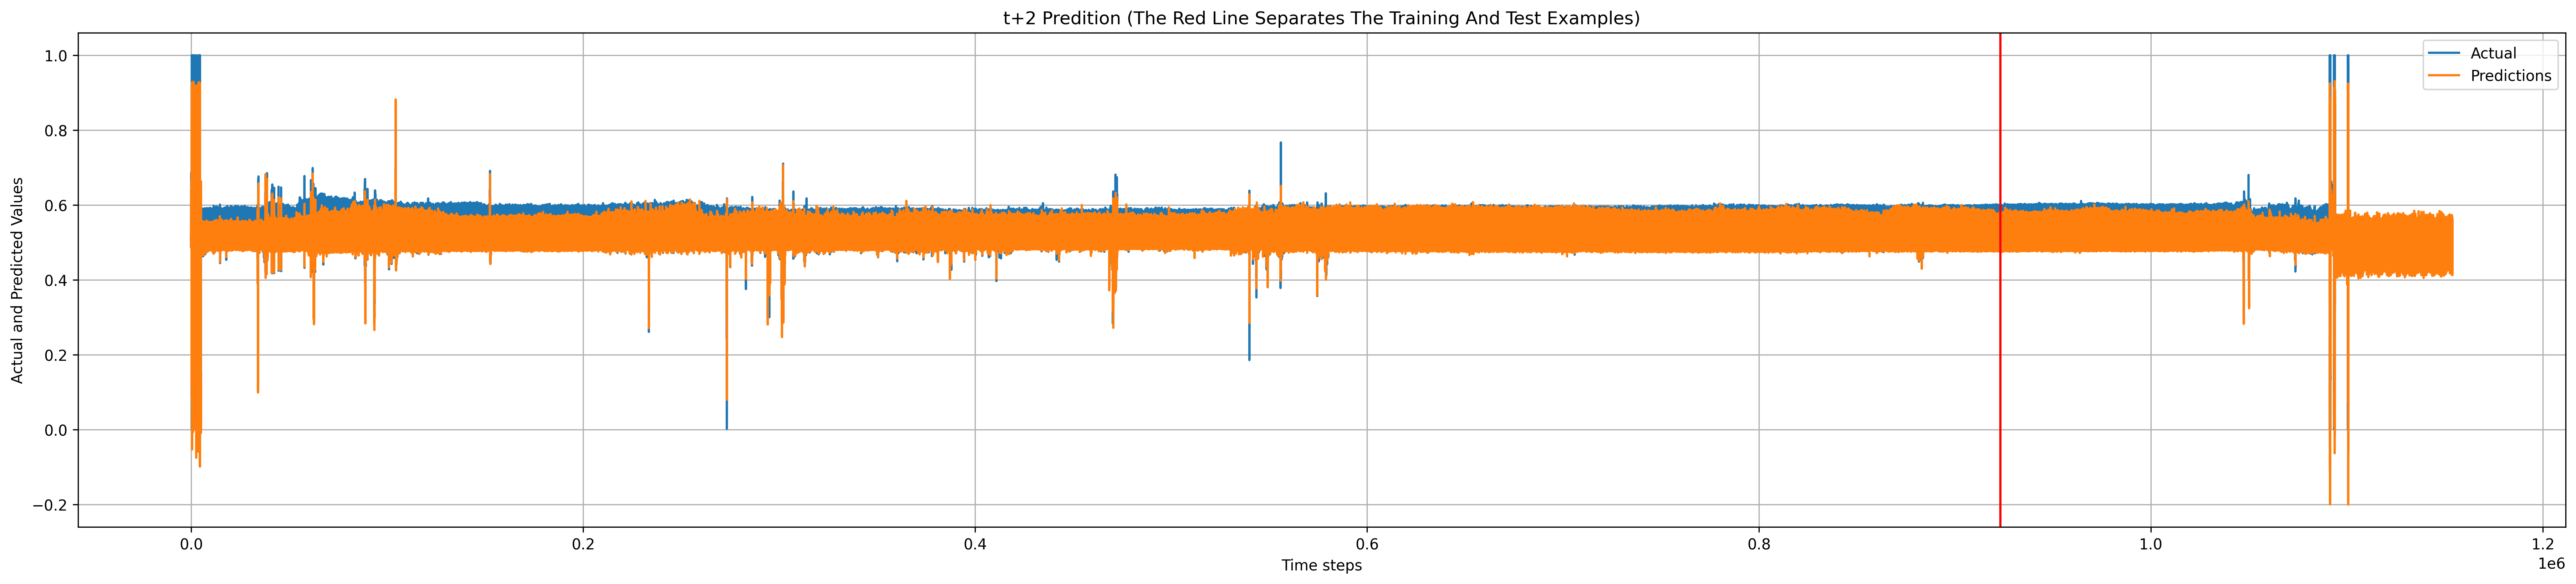

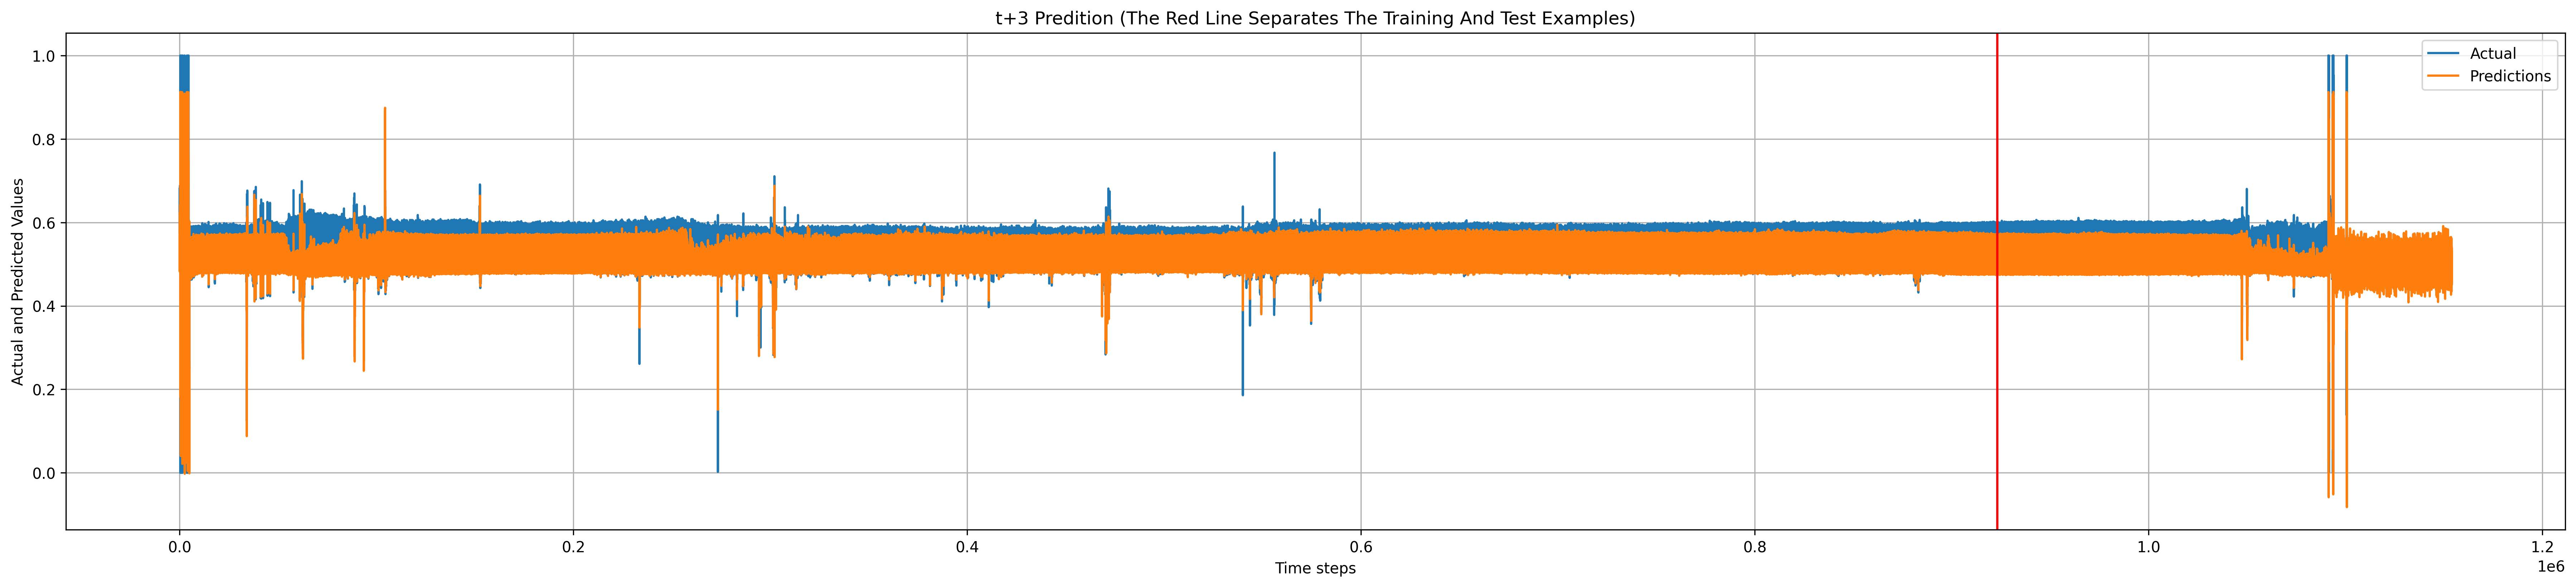

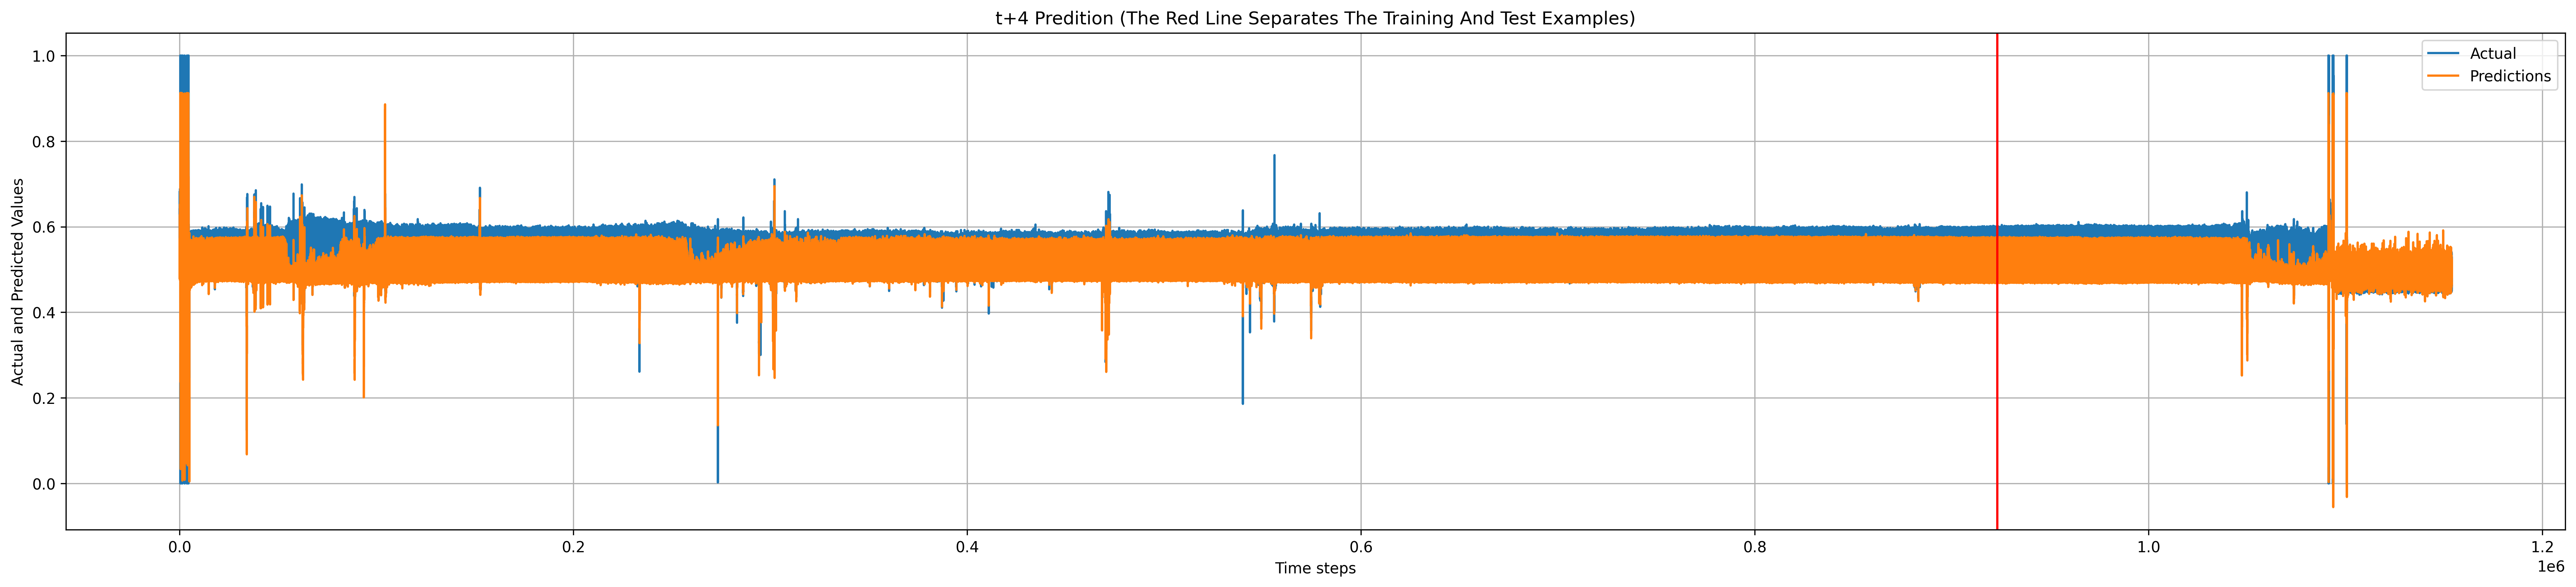

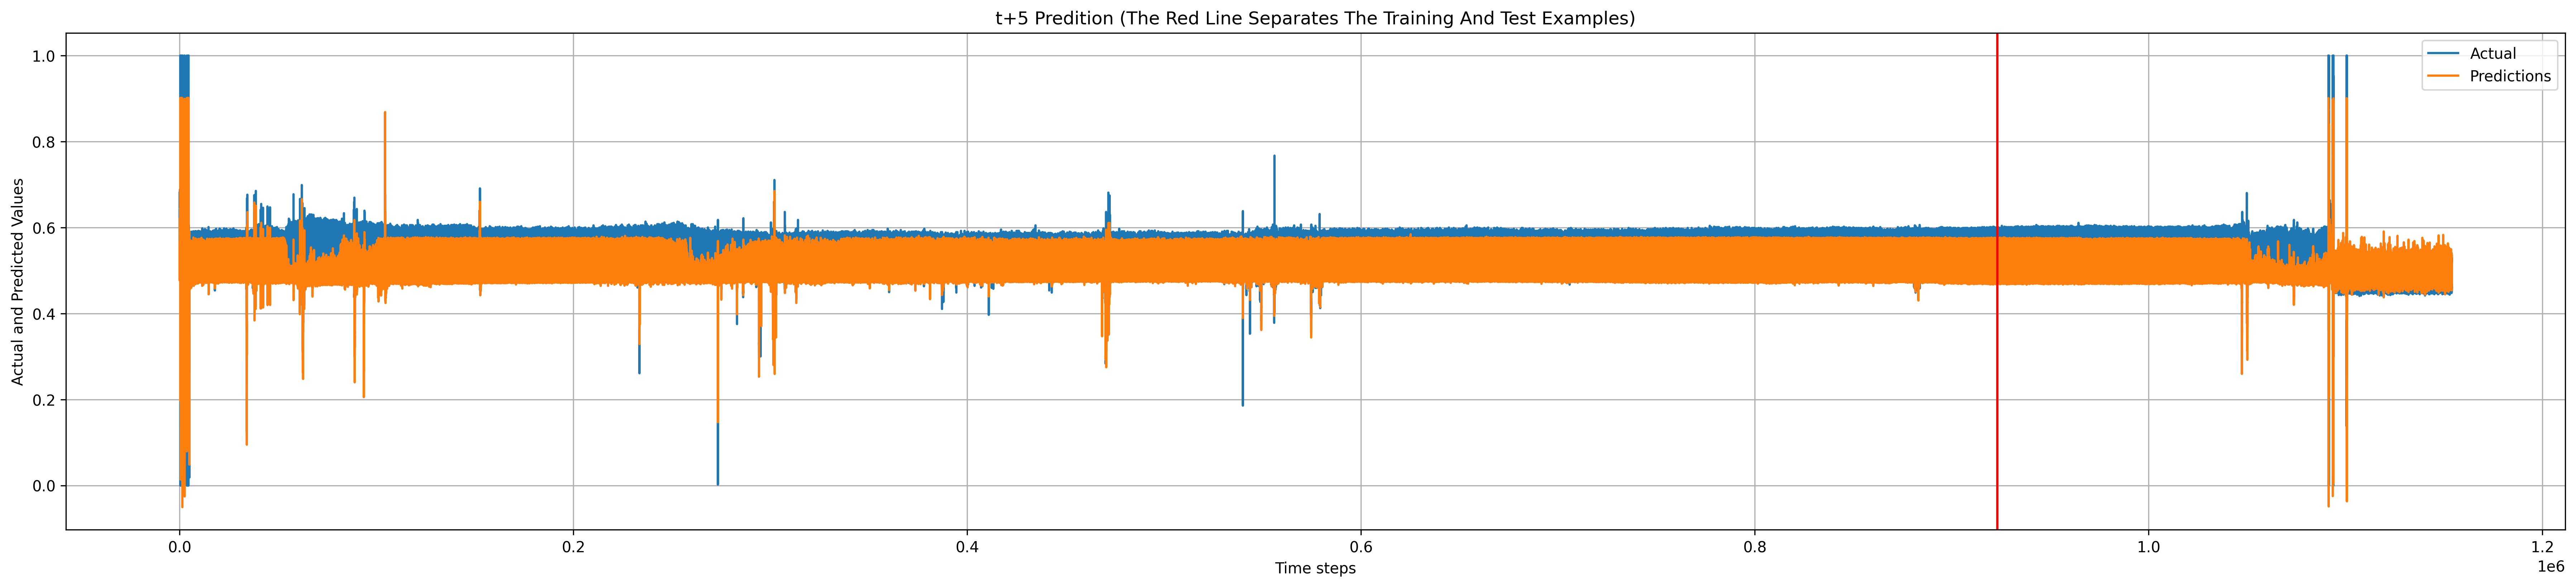

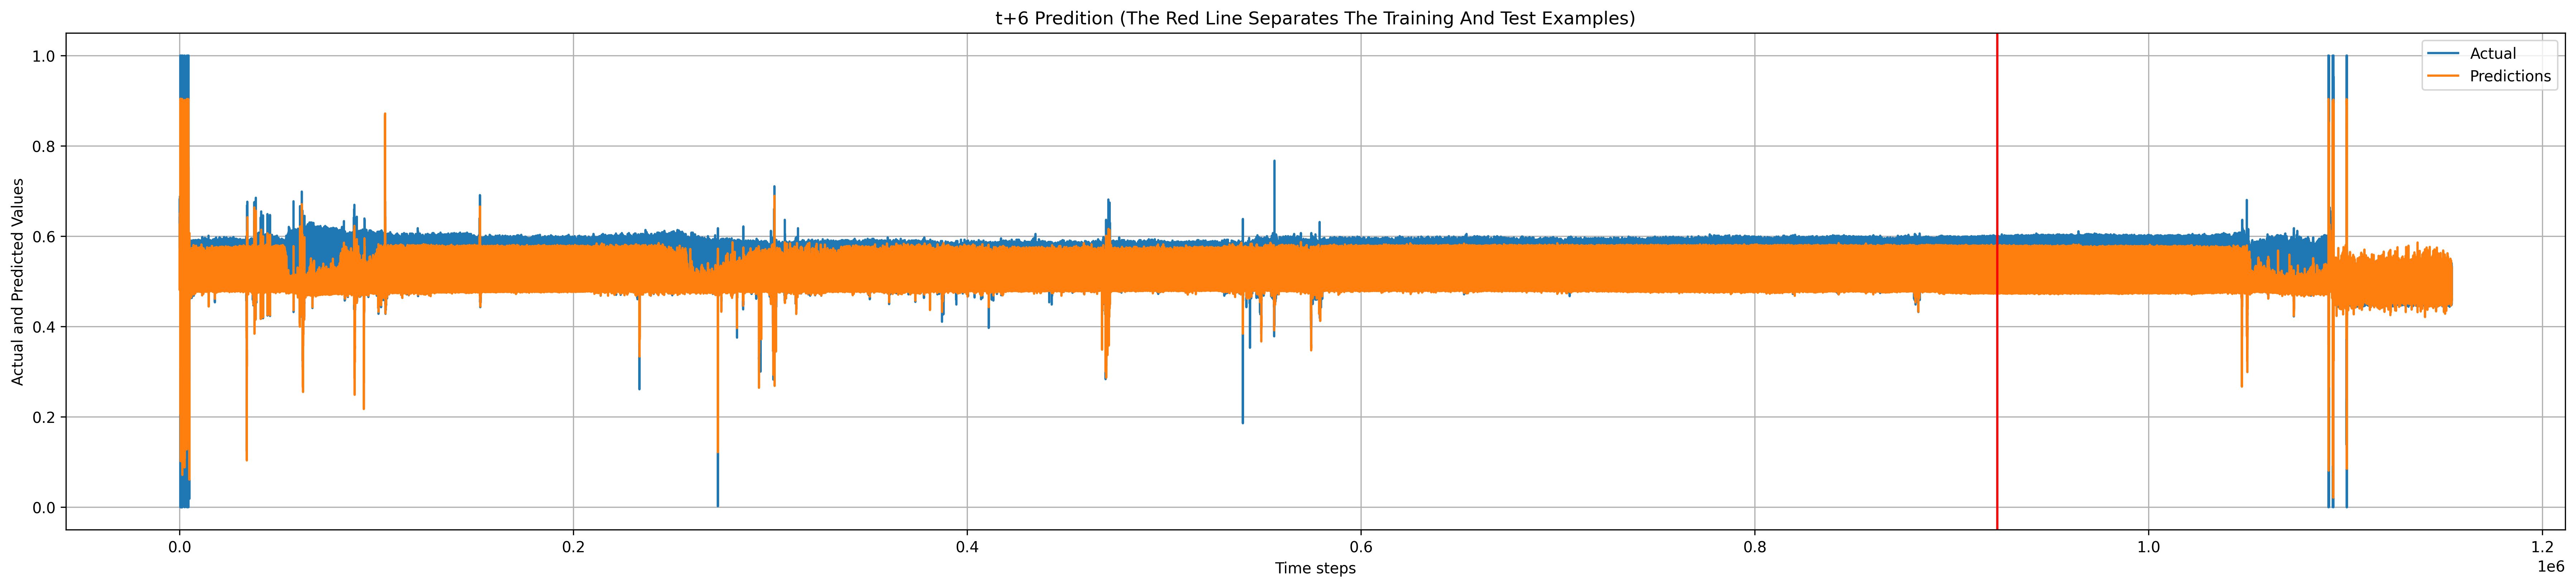

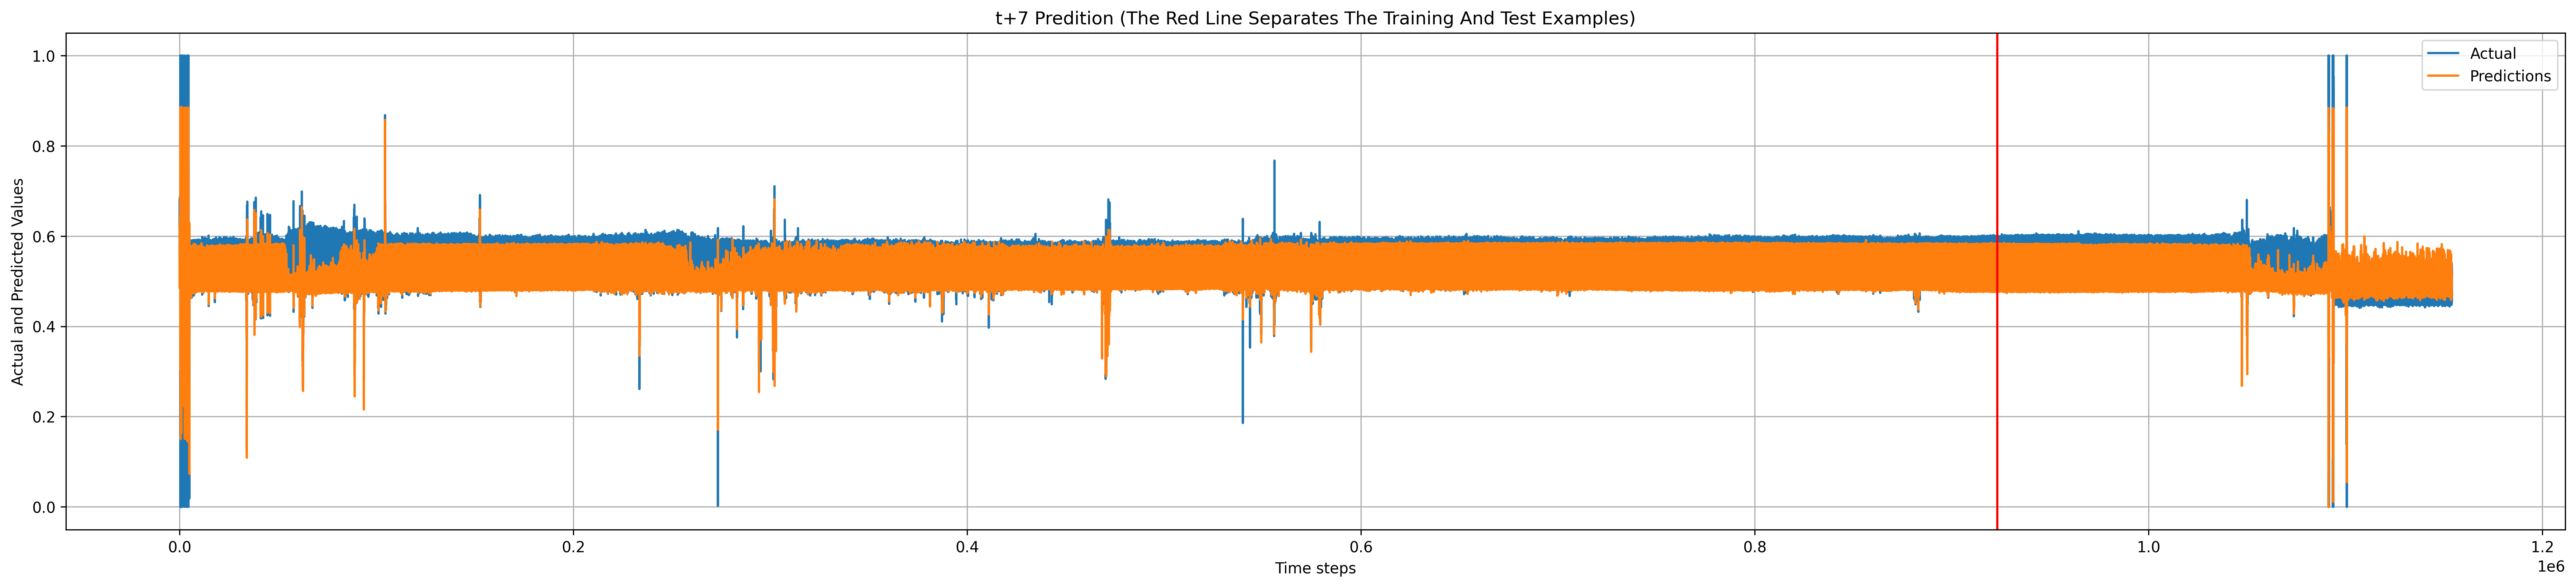

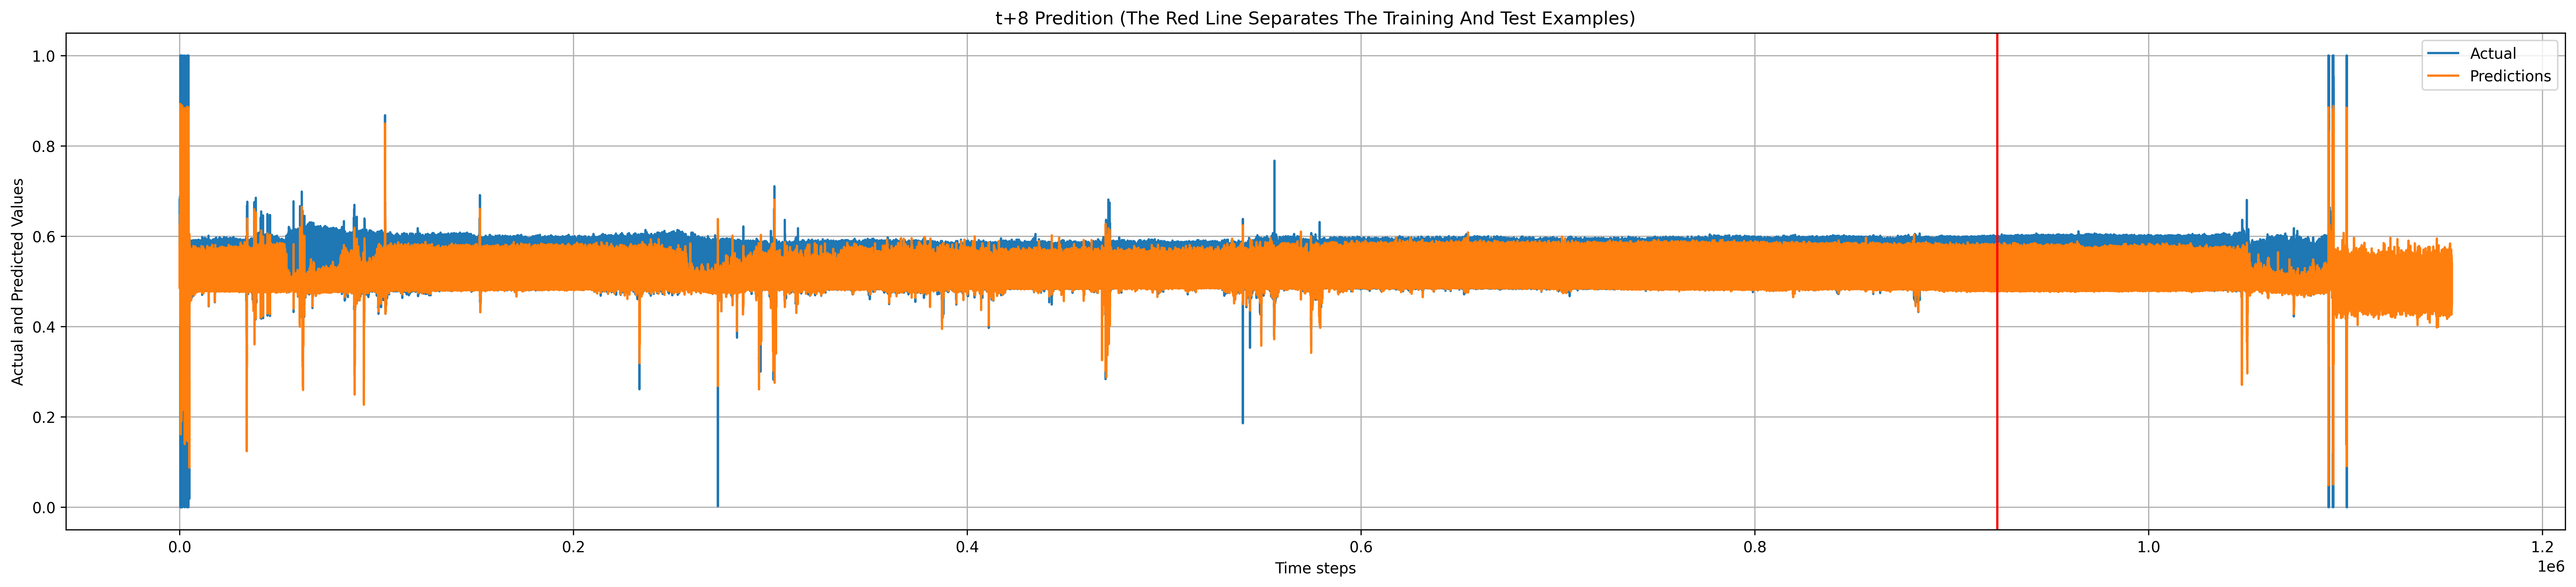

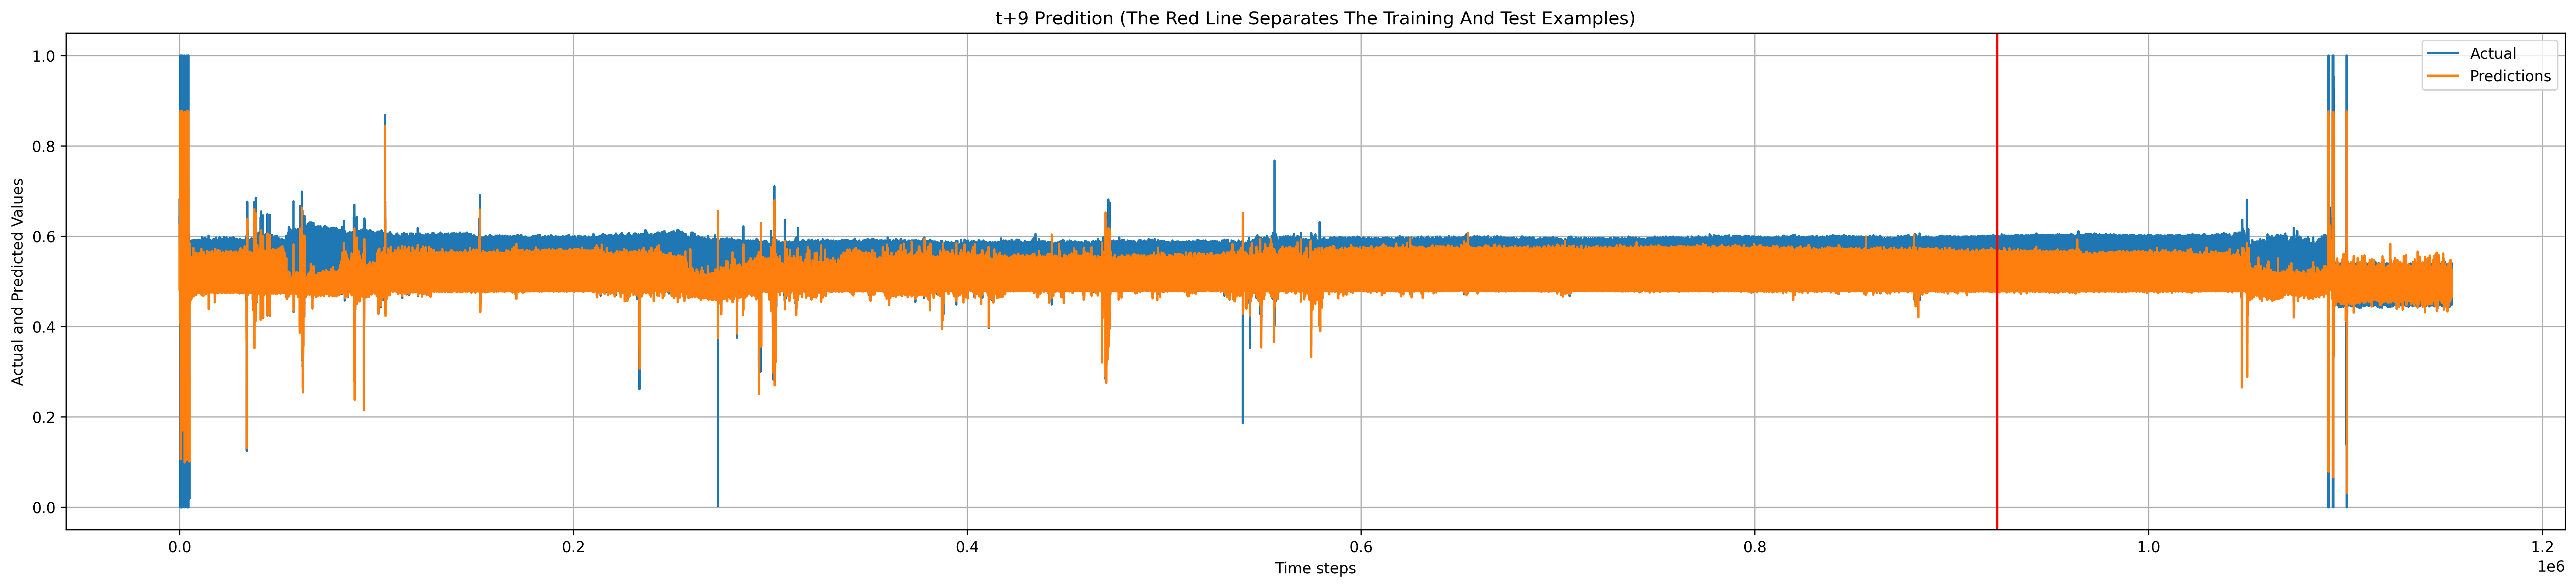

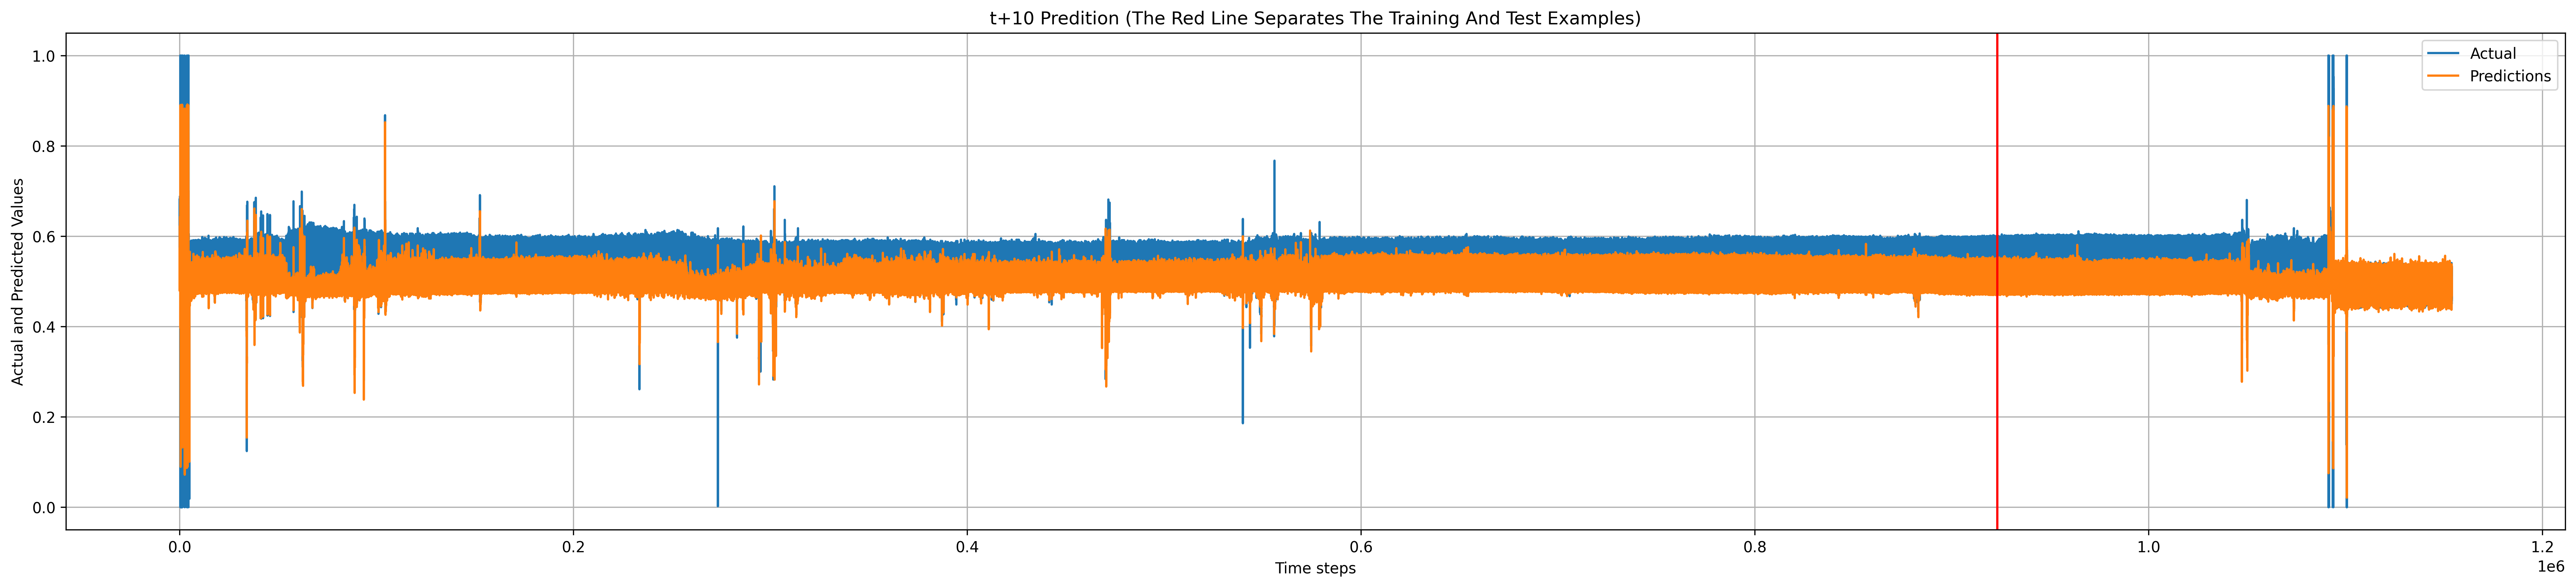

In [ ]:
for i in range(horizon):
    y_pred_train = train_predict if horizon == 1 else train_predict[:, i]
    y_pred_test = test_predict if horizon == 1 else test_predict[:, i]
    y_train = y if horizon == 1 else y[:, i]
    y_test = yt if horizon == 1 else yt[:, i]

    plot_result(y_train, y_test, y_pred_train, y_pred_test, i)

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
